# **Bike_Sharing_Linear_Reg**  
                                                                                                                                                        

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Data Preparation:

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
- You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

## Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


## Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.


- where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
- Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [55]:
#IMPORT NECESSARY LIBRARIES # will import necessary libraries/classes when it is required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# READING AND UNDERSTANDING DATA

In [56]:
#READING DATA AND LOOKING AT TOP ROWS
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [57]:
#looking at the shape of the dataset
df.shape

(730, 16)

In [58]:
#checking columns present in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [59]:
#Get basic idea of data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [60]:
#checking for datatypes and null-values of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [61]:
#checking for null values in dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Insights :
#### -The given dataset has 730 rowns and 16 columns.
#### -Except 'dteday' whose dtype is object (contains date type info), all other are either float or integer type.
#### -No null/missing values found in the dataset
#### -Some columns that are categorical in nature, but in integer/float type.

### DROPPING IRRELEVANT COLUMNS
#### -from the given data we can see that instant is an index column so we drop it.
#### -we already have yr and mnth columns, so dteday is not required.
#### -our target variable is cnt, hence we can delete casual and registered columns.

In [62]:
# instant columns contains index values only, not requried
df.drop(['instant'],axis=1,inplace=True)
# Cross checking the dataset after dropping 'instant' column
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [63]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion 
# and crosschecking the dataset
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [64]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered 
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Insights:
#### -From data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables but they are in numeric form
#### -We will replace season,weekday and weathersit with appropriate values

In [65]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [66]:
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [67]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


# EDA and Visualising the Data

<Figure size 432x432 with 0 Axes>

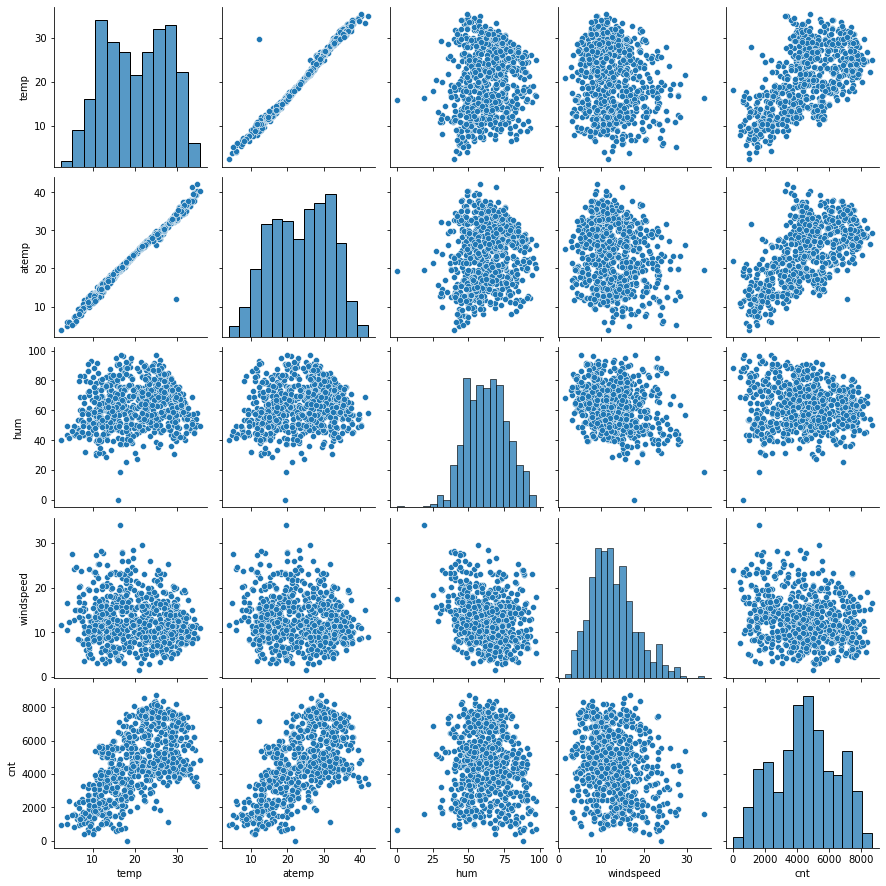

In [69]:
#Performing EDA to understand NUMERICAL vars
plt.figure(figsize =(6,6))
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

### Insights:
#### -There is linear relationship between temp and atemp.
#### -There is some positive linear trend between temp-cnt and atemp-cnt

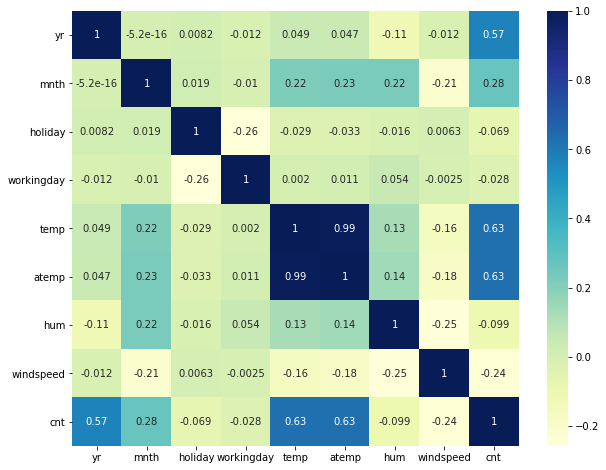

In [70]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights:
#### -There is a correlation of 0.63 between cnt-temp and cnt-atemp 
#### -There is a correlation of 0.99 between temp and atemp

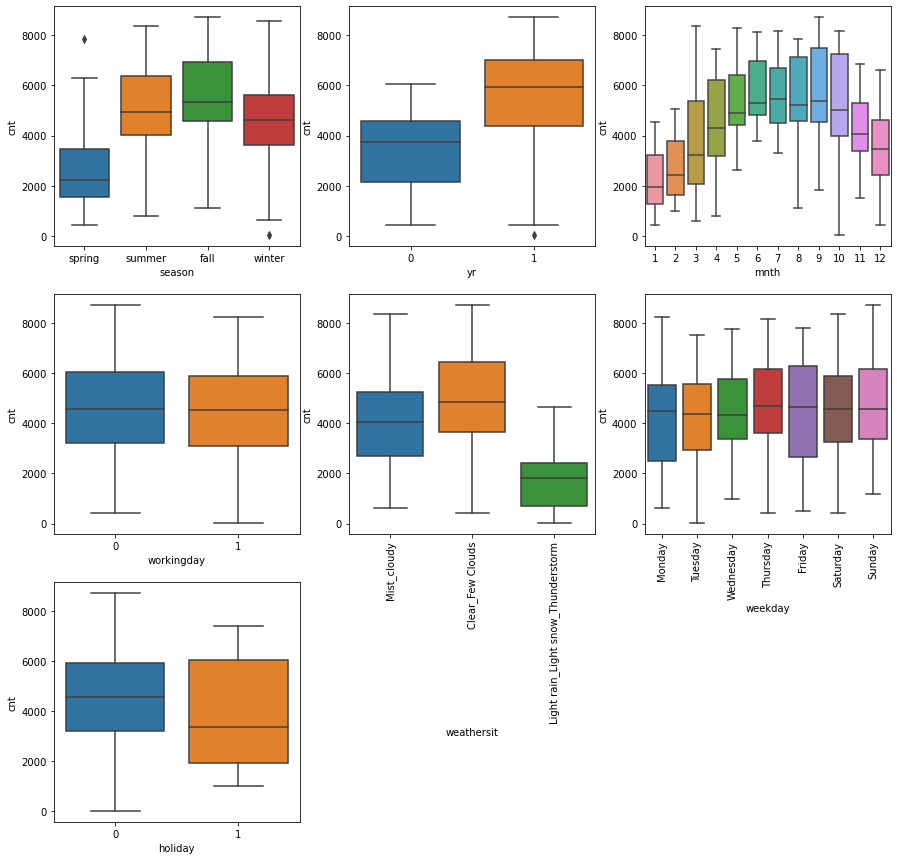

In [71]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

### Insights:
-"season": Most of the bike booking were happening in "summer" and "fall" with a median of over 5000 booking. This indicates, season can be a good predictor for the dependent variable.

-"mnth": Most bike booking were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

-"weathersit": Most of the bike booking were happening during "Clear_Few Clouds" with a median of close to 5000 booking followed by "Mist_cloudy" with median above 4000 .This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

-"holiday": Most of the bike booking were happening when it is not a holiday. This indicates, holiday can't be a good predictor for the dependent variable for increasing bookings.

-"weekday": weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

-"workingday": Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

-"yr": 2019 is clearly a better year the bike booking. This indicates it could be useful.

# Data Preparation for Modelling

## Creating dummy variables

####  *** Creating DUMMY variables for 4 categorical vars  "mnth", "weekday", "season" & "weathersit"

In [72]:
#Converting variables to object type

df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [73]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 
# Dropping 1st DUMMY variable for each variable(reason for dropping 1st is for efficiency)

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [74]:
# Concatinating dummy columns to original dataframe

df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

In [75]:
#Deleting the orginal columns season,weathersit,weekday & mnth

df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)

df.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## splitting the data

### -Splitting into train & test data 
### -Train:Test in70:30 ratio


In [76]:
#importing sklearn package for data split
from sklearn.model_selection import train_test_split
#splitting data into train data and test data
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [78]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,0


In [79]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


## Rescaling the features
#### We want to rescale on numerical variables 

In [80]:
#importing MinMaxscaler for rescaling
from sklearn.preprocessing import MinMaxScaler
#SCALING THE NUMERICAL DATA
scaler=MinMaxScaler()

In [81]:
#Creating a list of numeric variables
num_vars=['atemp','hum','temp','windspeed','cnt']
#Appling scaler() to num_vars
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [82]:
# cross checking 
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,0


In [83]:
# cross checking and Min Max of numeric columns
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


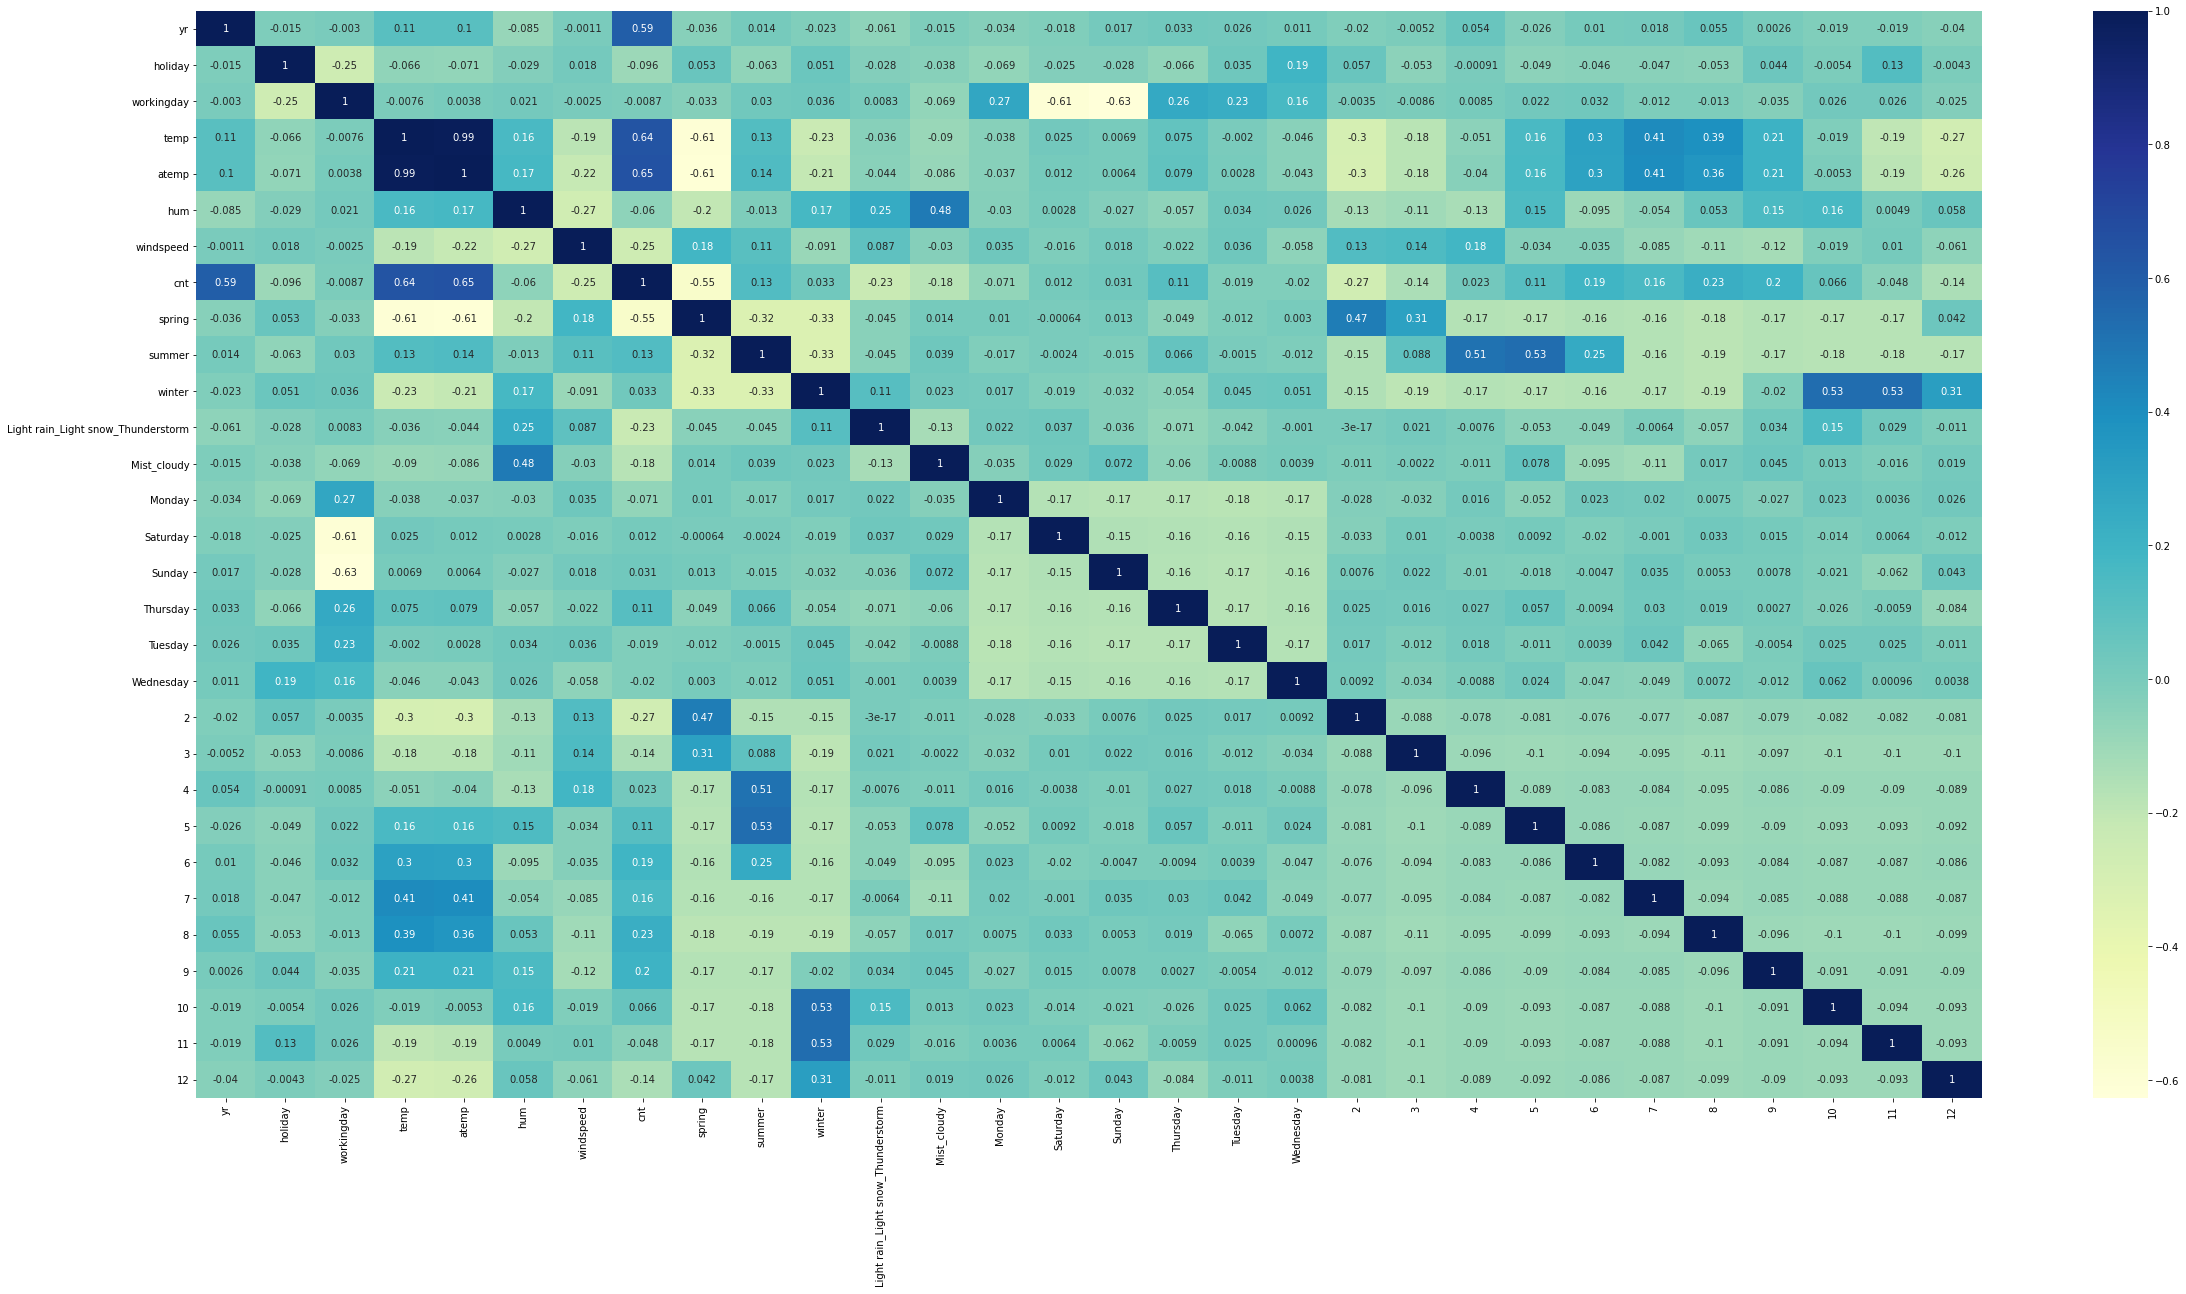

In [84]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (40, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing into X and Y sets for the model building

In [85]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [86]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [87]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Feature selection using RFE (will consider 15 features)
### We will be using RFE and manual feature selection method combined for optimum final model

In [88]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [89]:
#Creating the object of linearregression
lm = LinearRegression()
#fit the model
lm.fit(X_train, y_train)

LinearRegression()

In [90]:
# Running RFE with the output number of the variable equal to 15
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [91]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                     'temp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [92]:
X_train.columns[~rfe.support_]

Index(['workingday',      'atemp',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            4,
                  6,            7,           11,           12],
      dtype='object')

In [93]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

#### Model1

In [94]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  
# Adding a constant variable 
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [95]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [96]:
print(lm.params)

const                                 0.281162
yr                                    0.230385
holiday                              -0.089060
temp                                  0.484667
hum                                  -0.178353
windspeed                            -0.183595
spring                               -0.043588
summer                                0.071627
winter                                0.109846
Light rain_Light snow_Thunderstorm   -0.244542
Mist_cloudy                          -0.055804
3                                     0.033322
5                                     0.030660
8                                     0.051139
9                                     0.120896
10                                    0.043662
dtype: float64


In [97]:
#Let's see the summary of our linear model_1
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.95e-189
Time:                        12:58:49   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.50
2,temp,15.39
4,windspeed,4.77
5,spring,4.72
7,winter,4.33
6,summer,3.85
9,Mist_cloudy,2.29
0,yr,2.10
12,8,1.80
11,5,1.64


#### Decided to drop 'hum' due to high VIF.
#### Keeping 'temp' as temperature could be an important factor for a business like bike rentals. We will check this further

In [99]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe1.drop(['hum'],axis=1)

#### Model2

In [100]:
# Adding a constant to variable 
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [101]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe2).fit()

In [102]:
#Let's see the summary of our linear model_2
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.03e-185
Time:                        12:58:49   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.72
5,spring,6.08
7,winter,4.65
6,summer,3.83
3,temp,3.67
12,8,1.67
11,5,1.54
14,10,1.52
13,9,1.37
10,3,1.21


### Decided to drop '5' ("mnth") due to high p-Value(insignificant).


In [104]:
#COLUMN 5 HAS A VERY HIGH p-value(insignificant) SO WE DROP IT
X_train_rfe2=X_train_rfe2.drop([5],axis=1)

#### Model 3

In [105]:
 # Adding a constant variable 
X_train_rfe3 = sm.add_constant(X_train_rfe2)
# Running the linear model
lm2 = sm.OLS(y_train,X_train_rfe3).fit()
#lets see summary of our linear model_3
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.33e-186
Time:                        12:58:49   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     496   BIC:                            -918.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.17
5,spring,5.85
7,winter,4.56
3,temp,3.51
6,summer,3.06
11,8,1.67
13,10,1.52
12,9,1.37
10,3,1.17
4,windspeed,1.10


### Decided to drop "spring	" due to high VIF


In [107]:
#spring has high VIF so we drop it
X_train_rfe3=X_train_rfe3.drop(['spring'],axis=1)


### Model4

In [108]:
#adding constant
X_train_rfe4 = sm.add_constant(X_train_rfe3)
#fitting &running model
lm3 = sm.OLS(y_train,X_train_rfe4).fit()
#lets see the summary
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.10e-186
Time:                        12:58:50   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     497   BIC:                            -919.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.69
6,winter,1.75
3,temp,1.56
12,10,1.49
10,8,1.46
5,summer,1.37
11,9,1.24
9,3,1.12
4,windspeed,1.10
7,Light rain_Light snow_Thunderstorm,1.06


### Decided to drop cloumn "3" due high p-Value

In [110]:
#Column 3 has A VERY HIGH p-value WHICH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe4=X_train_rfe4.drop([3],axis=1)

### Model 5

In [111]:
#adding constant
X_train_rfe5 = sm.add_constant(X_train_rfe4)
#fitting & adding 
lm4 = sm.OLS(y_train,X_train_rfe5).fit()
#lets see the summary of the model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          3.21e-187
Time:                        12:58:50   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.93
6,winter,1.68
3,temp,1.52
11,10,1.49
9,8,1.45
5,summer,1.37
10,9,1.23
4,windspeed,1.09
7,Light rain_Light snow_Thunderstorm,1.06
8,Mist_cloudy,1.05


### Decided to drop "10" (month) due to high p-Value(insignificant).

In [113]:
#cOLUMN 10 HAS A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe5=X_train_rfe4.drop([10],axis=1)


### Model 6

In [114]:
# adding constant, fitting and running model
X_train_rfe6 = sm.add_constant(X_train_rfe5)
lm5 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.26e-187
Time:                        12:58:50   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.63
3,temp,1.47
9,8,1.44
5,summer,1.37
6,winter,1.27
10,9,1.20
4,windspeed,1.09
7,Light rain_Light snow_Thunderstorm,1.05
8,Mist_cloudy,1.05
1,yr,1.02


In [116]:
X_train_rfe6.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                     'temp',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          8,
                                          9],
      dtype='object')

#### Our model looks fitted so well but with 10 features, and VIF and P- values are looks good but still will remove some features based on correlation co-efficient to keep model simple 

### From correlation co-efficient we can see windspeed has negative correlationship with target variable so will drop that first

In [117]:
#cOLUMN windspeed HAS negative correlation SO WE DROP IT
X_train_rfe6=X_train_rfe6.drop(["windspeed"],axis=1)


### Model 7



In [118]:
# adding constant, fitting and running model
X_train_rfe7 = sm.add_constant(X_train_rfe6)
lm6 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.99e-181
Time:                        12:58:51   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.36
8,8,1.44
3,temp,1.43
4,summer,1.36
5,winter,1.25
9,9,1.20
7,Mist_cloudy,1.05
6,Light rain_Light snow_Thunderstorm,1.04
1,yr,1.02
2,holiday,1.02


#### We have considered all columns and checked.Now we stop the model building and check on which model can we choose
#### Out all the models, lm6 (Model7) seems to give good result so we choose it.

### Insights:
  --The Model 7 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.

  --The R-squared and Adj. R-squared looks very good at 0.823 and 0.819 respectively.

  --We will check the test data metrics to check whether this model is significant enough or not.


### Residual Analysis of the train data
   --Error terms are normally distributed with mean zero.

In [120]:
#Predict values
y_train_cnt = lm6.predict(X_train_rfe7)

In [121]:
#CALCULATING RESIDUALS

res= y_train - y_train_cnt

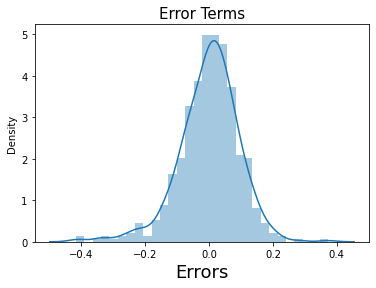

In [122]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
sns.distplot((res)) 
plt.title("Error Terms",fontsize = 15)
plt.xlabel('Errors', fontsize = 18)   # X-label
plt.show()

### Insights:
From the plot, we could see that residuals are normally distributed and hence, our assumption for linear regression is valid
Making Predictions Using the Final Model

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Making Prediction on test dataset & evaluation Using final model
  -- Scaling data(MinMaxScaler)
  
  -- Evaluating test data by R2 score

In [123]:
#Create a list of numeric variables
num_vars=['atemp','hum','temp','windspeed','cnt']

#Scale variables (only Transfer method)
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [124]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [125]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [127]:
X_train_new=X_train_rfe7.drop(["const"],axis=1)
X_train_new.head()

,yr,holiday,temp,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,8,9
653,1,0,0.509887,0,1,0,0,0,0
576,1,0,0.815169,0,0,0,0,0,0
426,1,0,0.442393,0,0,0,1,0,0
728,1,0,0.245101,0,0,0,0,0,0
482,1,0,0.395666,1,0,0,1,0,0


In [128]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test which are not part of our final model

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [129]:
#Making predictions using final model

y_pred = lm6.predict(X_test_new)

## Model Evaluation


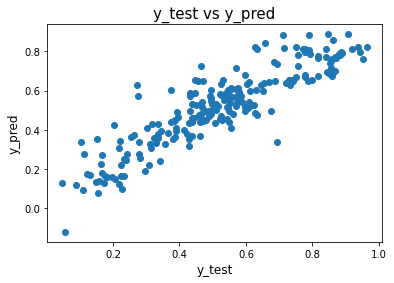

In [130]:
#CHECKING PREDICTED V/s TEST DATA to understand the spread 

plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred', fontsize=12)                          # Y-label
plt.show()

## R-Squared value Test

In [140]:
# importing library
from sklearn.metrics import r2_score 
r2=r2_score(y_true = y_test,y_pred =y_pred)
r2

0.7964731574157415

### **R square of our model is 0.796**

### Adjusted R-squared value test

In [138]:
## adj r2 = 1 - ((1-r2)*(N-1))/(N-p-1)
adjusted_r2 = 1 - ((1-r2)*(X_test.shape[0]-1)) /(X_test.shape[0]-X_test.shape[1]-1)
adjusted_r2

0.7652441709874691

### **Adjusted R square of our model is 0.765**

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.


## Final model equation:

#### cnt= 0.0703 + (yr * 0.2313) + (holiday * (-0.1002)) + (temp * 0.5390) + (summer * 0.0956) + (winter * 0.1462) + ( Light rain_Light snow_Thunderstorm * (-0.2974)) + (Mist_cloudy * (-0.0809)) + ( mnth('8') * 0.0585) + ( mnth('9') * 0.1236)

## We can see the demand for bikes depends mainly on below variables:

#### 'yr', 'holiday', 'temp', 'summer', 'winter','Light rain_Light snow_Thunderstorm','Mist_cloudy', 8, 9
                                         

##### Demands increases in the month of  8 ,9 ,and yr, summer
##### Demand decreases if it is holiday, Light rain_Light snow_Thunderstorm, Mist_cloudy